In [38]:
import pandas as pd
import glob
from functools import reduce
import matplotlib.pyplot as plt
import seaborn as sns




In [39]:
dfs_dict = {}
for file in glob.glob('./data/*.bed'):
    dfs_dict[file.split(".")[1].split("/")[2]] = pd.read_csv(file, sep='\t')

In [40]:
merged_df = pd.DataFrame()
count = 0
for filename in dfs_dict:
    count = count + 1
    file1 =''
    if(count == 1):
        merged_df = dfs_dict[filename]
        file1 = "AF"+"_"+filename
        merged_df = merged_df.rename(columns={"AF": "AF"+"_"+'tissue002_sample003'})
        merged_df["AF"] = ""
    else:
        if(count == 2):
            merged_df=pd.merge(merged_df, dfs_dict[filename]  , on = ['chr', 'start', 'end', 'ref', 'alt' ], suffixes=[file1, '_'+filename])
        else:
            merged_df=pd.merge(merged_df, dfs_dict[filename]  , on = ['chr', 'start', 'end', 'ref', 'alt' ], suffixes=['', '_'+filename])
    
        

In [41]:
merged_df

,chr,start,end,ref,alt,AF_tissue002_sample003,AF,AF_tissue002_sample007,AF_tissue004_sample001,AF_tissue005_sample006,...,AF_tissue005_sample008,AF_tissue001_sample003,AF_tissue001_sample006,AF_tissue003_sample008,AF_tissue002_sample002,AF_tissue001_sample007,AF_tissue001_sample004,AF_tissue005_sample003,AF_tissue002_sample005,AF_tissue003_sample005
0,chr15,700042,711367,C,G,0.13,,0.91,0.53,0.19,...,0.39,0.67,0.67,0.37,0.73,0.64,0.78,0.28,0.68,0.60
1,chr19,309594,395824,C,G,0.24,,0.19,0.49,0.40,...,0.34,0.65,0.58,0.61,0.61,0.69,0.72,0.32,0.76,0.34
2,chr14,619270,834083,T,G,0.72,,0.75,0.54,0.31,...,0.29,0.68,0.90,0.49,0.22,0.67,0.73,0.06,0.68,0.38
3,chr3,534653,761352,T,A,0.63,,0.43,0.54,0.31,...,0.32,0.82,0.68,0.32,0.92,0.81,0.67,0.22,0.85,0.61
4,chr10,348860,915399,A,C,0.45,,0.67,0.53,0.17,...,0.30,0.77,0.51,0.61,0.80,0.69,0.67,0.17,0.31,0.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,chr8,707032,209649,G,T,0.94,,0.95,0.57,0.25,...,0.03,0.68,0.63,0.51,0.79,0.76,0.79,0.20,0.73,0.58
108,chr3,331994,451093,T,G,0.91,,0.66,0.56,0.09,...,0.04,0.88,0.76,0.58,0.90,0.84,0.69,0.37,0.62,0.41
109,chr4,815959,894695,C,T,0.15,,0.43,0.48,0.21,...,0.34,0.90,0.63,0.70,0.53,0.60,0.90,0.09,0.70,0.30
110,chr12,884865,998216,A,T,0.31,,0.84,0.43,0.29,...,0.15,0.68,0.88,0.68,0.16,0.55,0.89,0.01,0.75,0.32


In [42]:
numric_df = merged_df.loc[:, ~merged_df.columns.isin(['start', 'end', 'chr', 'end', 'ref', 'alt', 'AF'])]

In [43]:
mean_arr = numric_df.mean()
mean_dict = {}
for i in range(len(mean_arr)):
    tissue = mean_arr.index[i].split("_")[1]
    sample = mean_arr.index[i].split("_")[2]
    mean_value = mean_arr[i]
    if sample in mean_dict.keys():
        mean_dict[sample][tissue] = mean_value
    else:
        mean_dict[sample] = {}
        mean_dict[sample][tissue] = mean_value


In [44]:
mean_matrix = pd.DataFrame.from_dict(mean_dict)

In [45]:
mean_matrix

,sample003,sample007,sample001,sample006,sample005,sample002,sample010,sample009,sample004,sample008
tissue002,0.507589,0.512768,0.503125,0.497054,0.525268,0.479554,0.504732,0.503929,0.501429,0.479554
tissue003,0.501071,0.489107,0.491964,0.516071,0.496696,0.516339,0.478393,0.502054,0.498125,0.493571
tissue004,0.491250,0.497321,0.504643,0.500089,0.505446,0.501875,0.501607,0.505982,0.497768,0.491518
tissue001,0.718304,0.696429,0.693661,0.720268,0.704821,0.687946,0.697946,0.694732,0.690536,0.692232
tissue005,0.222411,0.192500,0.190625,0.184375,0.202679,0.195893,0.204375,0.204286,0.200446,0.220089


In [46]:
boxplot = numric_df.boxplot()

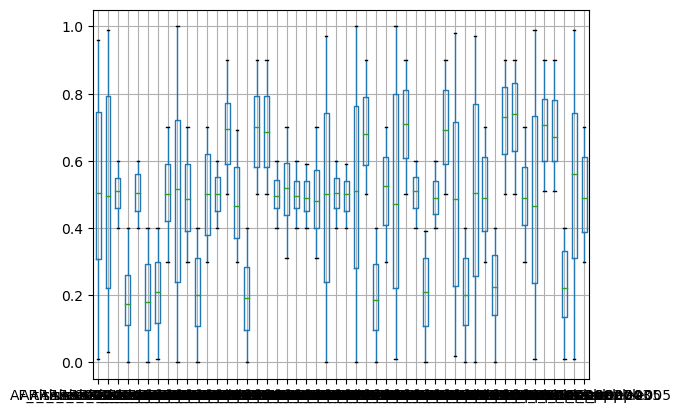

In [47]:
plt.show()

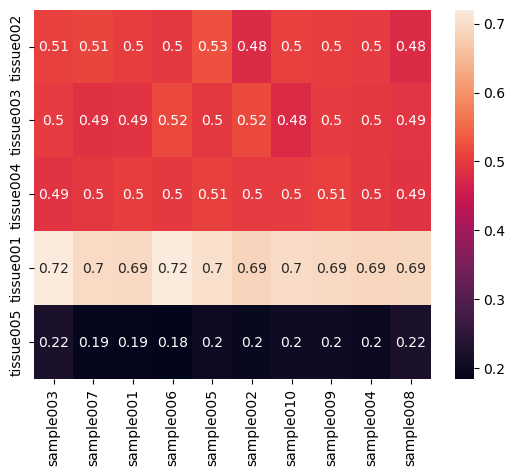

In [48]:
sns.heatmap(mean_matrix, annot=True)
plt.show()

## Ans 4.1 From heat map, it is clear that tissue 1 has on average highest AFs and tissue 5 on average have low AFs

In [58]:
from scipy.stats import ttest_ind
ttest_ind(mean_matrix.loc['tissue001'], mean_matrix.loc['tissue005'])

Ttest_indResult(statistic=94.99207416577326, pvalue=9.11916662891358e-26)

## Higher t score value shows th